In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pickle
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import openslide

# Check that image and feature blocks match
def display_quilt_feature(feature_quilt_path):
    feature_quilt = pickle.load(open(feature_quilt_path, 'rb'))
    feature_quilt = torch.Tensor(feature_quilt.transpose((2,0,1)))
    plt.imshow(np.mean(feature_quilt.cpu().numpy(), axis=0))

def display_image(image_path):
    try:
        im = Image.open(image_path)
        return im.resize((300,300))
    except: # svs path
        im = openslide.OpenSlide(image_path).get_thumbnail((300,300))
        return im


In [4]:
import sys
sys.path.append("../clinical_data_classifier")
from rtog_helper import rtog_from_study_number
import pandas as pd

def printc(df):
    """Helper function. Prints all the columns of a pandas dataframe."""
    prev = pd.options.display.max_columns
    prev_r = pd.options.display.max_rows
    pd.options.display.max_columns = None
    pd.options.display.max_rows = 20
    display(df)
    pd.options.display.max_columns = prev
    pd.options.display.max_rows = prev_r

rtogs = {}
study_numbers = ['9202', '9413', '9408']
for sn in study_numbers:
    print("loading {}".format(sn))
    rtogs[sn] = rtog_from_study_number(sn).df

loading 9202
loading 9413
loading 9408


In [5]:
# Show the original slides for 9413-1125
# get slide ids. Load. 

from histopathology_image_helper import load_slide_case_correspondence

# slideInfo_9413 = [
#     "/export/medical_ai/ucsf/box_data/Aperio Images of NRG GU H&E Slides/RTOG-9413/10.22.2020/9413_10.22.2020 DeIDed Slide Information.xlsx",
#     "/export/medical_ai/ucsf/box_data/Aperio Images of NRG GU H&E Slides/RTOG-9413/10.5.2020/9413_10.5.2020 DeIDed Slide Information Updated 10.21.20.xlsx",
#     "/export/medical_ai/ucsf/box_data/Aperio Images of NRG GU H&E Slides/RTOG-9413/11.24.2020/9413_11.24.2020 DeIDed Slide Information.xlsx",
#     "/export/medical_ai/ucsf/box_data/Aperio Images of NRG GU H&E Slides/RTOG-9413/11.9.2020 RC slides/9413_11.9.2020 DeIDed Slide Information.xlsx",
#     "/export/medical_ai/ucsf/box_data/Aperio Images of NRG GU H&E Slides/RTOG-9413/8.25.2020/8.25.2020 DeIDed Slide Information Updated 10.21.2020.xlsx",
# ]

df_slidecase = {}
skipped = {}
for sn in study_numbers:
    df, skip = load_slide_case_correspondence(sn, return_skipped=True)
    df_slidecase[sn] = df
    skipped[sn] = skip
    print("Study {}: skipped: {}".format(sn, len(skip)))

# printc(rtogs['9413'])

Study 9202: skipped: 0
Study 9413: skipped: 0
Study 9408: skipped: 0


In [26]:
df_slidecase[sn][df_slidecase[sn]['image id'] == 101073]['cn_deidentified'].values[0]
# d = rtogs[sn]
d.loc[d['cn_deidentified'] == 3, 'gleason_primary'].values[0]#['gleason_primary']

3.0

In [20]:
sn = np.random.choice(study_numbers)
cndeid = np.random.choice(rtogs[sn]['cn_deidentified'].values)
print("Study number: {}; Case ID {}".format(sn, cndeid))

quilt_feature = '/export/medical_ai/ucsf/simclr_rtog/checkpoint_110/RTOG_{}_simclr/{}_quilt_feature.pkl'.format(
    sn, cndeid
)
quilt_image = '/export/medical_ai/ucsf/simclr_rtog/checkpoint_110/RTOG_{}_simclr/{}_quilt.tiff'.format(
    sn, cndeid
)

Study number: 9413; Case ID 461


In [21]:
df_slidecase[sn][df_slidecase[sn]['cn_deidentified'] == cndeid]
# df_slidecase_9413[df_slidecase_9413['cn_deidentified'] == cndeid]
original_slide_paths = []
for image_id in df_slidecase[sn][df_slidecase[sn]['cn_deidentified'] == cndeid]['image id'].values:
    image_id = int(image_id)
    path = "/export/medical_ai/ucsf/RTOG-{}/svs/{}.svs".format(sn, image_id)
    original_slide_paths.append(path)
original_slide_paths

['/export/medical_ai/ucsf/RTOG-9413/svs/97352.svs',
 '/export/medical_ai/ucsf/RTOG-9413/svs/97353.svs']

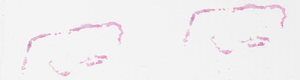

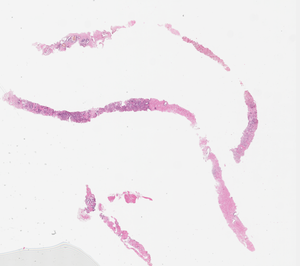

In [22]:
for p in original_slide_paths:
    display(display_image(p))

/export/medical_ai/ucsf/simclr_rtog/checkpoint_110/RTOG_9413_simclr/461_quilt_feature.pkl
/export/medical_ai/ucsf/simclr_rtog/checkpoint_110/RTOG_9413_simclr/461_quilt.tiff


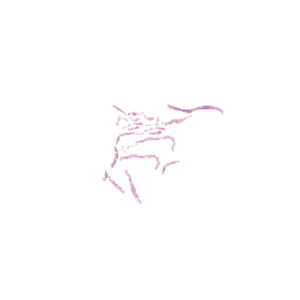

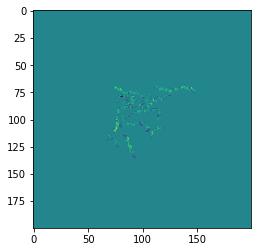

In [23]:
display_quilt_feature(quilt_feature); print(quilt_feature)
im = display_image(quilt_image); print(quilt_image)
im

In [24]:
# missing Quilt: 9413 case 903
# missing quilt: 9202 case 1387
# missing quilt: Study number: 9202; Case ID 909
# missing quilt: Study number: 9202; Case ID 503
# missing quilt: Study number: 9202; Case ID 337
# missing quilt: Study number: 9202; Case ID 269 - surprised that this is missing. Not much tissue.
# missing quilt: Study number: 9202; Case ID 1424
# missing quilt: Study number: 9202; Case ID 1083
# missing quilt: Study number: 9202; Case ID 244
# missing quilt: Study number: 9413; Case ID 1061



# Quilt is missing tissue slides: Study number: 9408; Case ID 1972; slides: 
# ['/export/medical_ai/ucsf/RTOG-9408/svs/102952.svs',
#  '/export/medical_ai/ucsf/RTOG-9408/svs/102953.svs',
#  '/export/medical_ai/ucsf/RTOG-9408/svs/103560.svs']


In [29]:
p = pickle.load(open(quilt_feature, 'rb')).transpose((2,0,1))
np.max(p)

0.39228612184524536

In [30]:
np.min(p)

-0.4510045051574707